# Initial Setup

In [ ]:
!apt install tree
!pip install scikeras
!pip install keras-tuner

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (119 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 28.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tree -d "/content/drive/My Drive/Thesis/partitioned_dataset"

/content/drive/My Drive/Thesis/partitioned_dataset
├── test_30
│   ├── Emergency_Vehicle
│   ├── Explosion
│   ├── Gunshot
│   ├── Other_(Music,Bell,Speech,Silence,Sneeze)
│   └── Power_Tool
└── train_70
    ├── Emergency_Vehicle
    ├── Explosion
    ├── Gunshot
    ├── Other_(Music,Bell,Speech,Silence,Sneeze)
    └── Power_Tool

12 directories


# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

# Data Processing

In [ ]:
train_dir = "/content/drive/My Drive/Thesis/partitioned_dataset/train_70"
test_dir = "/content/drive/My Drive/Thesis/partitioned_dataset/test_30"

In [ ]:
# to make all features equally important
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch = 100
# steps_per_epoch = len(X_train)//batch_size

# validation_steps = len(X_test)//batch_size # if you have validation data

In [ ]:
# train_generator = train_datagen.flow_from_directory(
#         train_dir, # el directorio donde están las imágenes de train
#         target_size= (150, 150), # se hace un reescalado (no tienen el mismo tamaño)
#         batch_size= batch, # Cuántas imágenes se toman en iteración
#         class_mode='categorical') # Clasificacón binaria, cada carpeta dentro de train_dir
#                              # es una clase.

# test_generator = test_datagen.flow_from_directory(
#         test_dir,
#         target_size= (150, 150),
#         batch_size= batch,
#         class_mode='categorical')


# Transfer Learning Model Definition

In [ ]:
# Pre-trained model
base_model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:512: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobilenetV3large"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 75, 75, 16)     │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 75, 75, 16)     │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 75, 75, 16)     │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 75, 75, 16)     │            144 │ activation[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 75, 75, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 75, 75, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 75, 75, 16)     │            256 │ re_lu[0][0]            │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_bn  │ (None, 75, 75, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_add (Add)   │ (None, 75, 75, 16)     │              0 │ activation[0][0],      │
│                           │                        │                │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand    │ (None, 75, 75, 64)     │          1,024 │ expanded_conv_add[0][… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_expand_bn │ (None, 75, 75, 64)     │            256 │ expanded_conv_1_expan… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 75, 75, 64)     │              0 │ expanded_conv_1_expan… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_1_depthwis… │ (None, 77, 77, 64)     │              0 │ re_lu_1[0][0]          │
│ (ZeroPadding2D)           │                        │                │                        │
├──────────────────────

 Total params: 2,996,352 (11.43 MB)

 Trainable params: 2,971,952 (11.34 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [ ]:
base_model.trainable = False
model = keras.Sequential([
    base_model,
    keras.layers.AveragePooling2D(pool_size=(7, 7), strides=(7,7), padding="same"), # Procesar todas las imágenes como vectores hasta este punto, una matriz numérica donde cada fila es una imagen, se guarda en una estructura como matriz de numpy (ejemplo).
])

In [ ]:
def feature_extraction(img_path, model):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    features = model.predict(img_array)
    return features

In [ ]:
import os

def get_png_paths(root_dir):
    png_paths = []
    for dirpath, _, filenames in os.walk(root_dir):
        for filename in filenames:
            if filename.lower().endswith('.png'):
                png_paths.append(os.path.abspath(os.path.join(dirpath, filename)))
    return png_paths

root_directory = "/content/drive/My Drive/Thesis/partitioned_dataset"
png_paths = get_png_paths(root_directory)

print(len(png_paths))
print(png_paths[0].split('/')[-2])

4974
Emergency_Vehicle


In [ ]:
features = []
indexToLabel = dict()
i = 0
for img_path in png_paths:
    features.append(feature_extraction(img_path, model).flatten())
    indexToLabel[i] = img_path.split('/')[-2]
    i += 1

print(len(features))
print(len(features[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━

In [ ]:
import csv
save_path = "/content/drive/My Drive/Thesis/"

# Save the array using numpy.save()
np.save(save_path + '/resulting_array_mobile_net_v3.npy', features)

with open(save_path + '/indexToLabel_mobile_net_v3.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Key', 'Value'])  # Write header

    for key, value in indexToLabel.items():
        csv_writer.writerow([key, value])


In [ ]:
print(len(features))
print(len(features[0]))
print(features[0])

4974
960
[-3.74562740e-02  2.45215940e+00  2.29387656e-01  0.00000000e+00
  1.49195695e+00  1.86609142e-02  1.25361085e+00  0.00000000e+00
  0.00000000e+00 -1.15695810e-02  6.49016425e-02 -1.54471665e-03
 -9.23855975e-03  0.00000000e+00  3.92360101e-03  0.00000000e+00
 -1.02008857e-01  0.00000000e+00  5.38964830e-02  0.00000000e+00
  0.00000000e+00  2.42960095e+00 -4.72084153e-03 -5.29834926e-02
  2.09742332e+00  0.00000000e+00  6.39297739e-02 -1.69099476e-02
  0.00000000e+00  0.00000000e+00  8.84344518e-01  1.98448449e-01
 -2.33925693e-02  0.00000000e+00  0.00000000e+00  1.05554080e+00
 -5.62744157e-04  0.00000000e+00  1.87163126e+00 -6.46837577e-02
  0.00000000e+00 -6.11047633e-02 -1.03508355e-02  0.00000000e+00
  0.00000000e+00  8.56182218e-01  0.00000000e+00  0.00000000e+00
 -9.91508588e-02  0.00000000e+00  7.55114019e-01  0.00000000e+00
  0.00000000e+00 -1.56470388e-02  0.00000000e+00  0.00000000e+00
  6.89134672e-02  0.00000000e+00  5.40469527e-01  0.00000000e+00
 -5.61179817e-02

# *Load* the Data

In [ ]:
import numpy as np
import pandas as pd

# Load features
features = np.load("/content/drive/My Drive/Thesis/resulting_array_mobile_net_v3.npy")

# Load labels
label_df = pd.read_csv("/content/drive/My Drive/Thesis/indexToLabel_mobile_net_v3.csv")
labels = label_df["Value"].to_numpy()
# Convert string labels to integers
label_mapping = {label: index for index, label in enumerate(np.unique(labels))}
print(np.unique(labels))
labels = np.array([label_mapping[label] for label in labels])

# One-hot encode the integer labels
num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes)

print(labels)
print(labels.shape)
print(features.shape)
print(num_classes)

['Emergency_Vehicle' 'Explosion' 'Gunshot'
 'Other_(Music,Bell,Speech,Silence,Sneeze)' 'Power_Tool']
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(4974, 5)
(4974, 960)
5


Split the data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)


model architecture

In [ ]:
# Build your model on top of the extracted features

model = tf.keras.Sequential([
    # Replace with your desired layers here
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.L2(0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(num_classes, activation="softmax")
])
opt = keras.optimizers.Adam(learning_rate=0.0001)
# Compile the model with an optimizer and loss function
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])


Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - categorical_accuracy: 0.3370 - loss: 291.7246 - val_categorical_accuracy: 0.6060 - val_loss: 183.6723
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.5821 - loss: 158.6427 - val_categorical_accuracy: 0.6653 - val_loss: 97.4395
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.6391 - loss: 83.4874 - val_categorical_accuracy: 0.6603 - val_loss: 49.7327
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.6483 - loss: 42.2350 - val_categorical_accuracy: 0.6653 - val_loss: 24.3972
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.6736 - loss: 20.5640 - val_categorical_accuracy: 0.6714 - val_loss: 11.6296
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.6794 - loss: 9.7794 - val_categorical_accuracy: 0.6764 - val_loss: 5.5558
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy

Evaluate the model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.7178 - loss: 0.8973 
Validation categorical accuracy: 0.7195979952812195


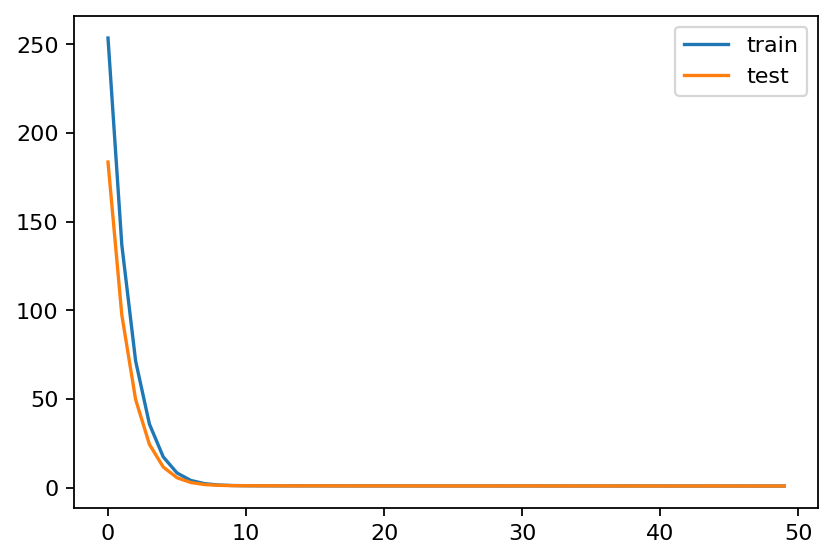

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation categorical accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()


In [ ]:
# https://www.youtube.com/watch?v=6Nf1x7qThR8
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import L2
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import keras_tuner as kt

# Function to create model
def model_builder(params):
    model = Sequential()

    param_learning_rate = params.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    param_l2_reg = params.Choice('kernel_regularizer', values=[0.5, 0.05, 0.005, 0.0005])
    param_dropout = params.Choice('dropout_rate', values=[0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.005])

    model.add(Dense(512, activation="relu", kernel_regularizer=L2(param_l2_reg)))
    model.add(Dropout(param_dropout))
    model.add(Dense(num_classes, activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=param_learning_rate)

    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])

    return model

# Creating the tuner
tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective('val_categorical_accuracy', direction='max'),  # Tune for val accuracy
    max_trials=20,
    executions_per_trial=2,  # Run each trial multiple times to account for randomness
    directory='dir',
    project_name='random_search_tuning'
)

# Performing the hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

Trial 20 Complete [00h 01m 15s]
val_categorical_accuracy: 0.7876884341239929

Best val_categorical_accuracy So Far: 0.7876884341239929
Total elapsed time: 00h 25m 41s


In [ ]:
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 0.0001,
 'kernel_regularizer': 0.0005,
 'dropout_rate': 0.1,
 'batch_size': 16}

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - categorical_accuracy: 0.4242 - loss: 1.6554 - val_categorical_accuracy: 0.6653 - val_loss: 1.1796
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.6758 - loss: 1.1393 - val_categorical_accuracy: 0.7025 - val_loss: 1.0551
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.7279 - loss: 1.0108 - val_categorical_accuracy: 0.7367 - val_loss: 0.9865
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.7435 - loss: 0.9371 - val_categorical_accuracy: 0.7307 - val_loss: 0.9505
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.7786 - loss: 0.8590 - val_categorical_accuracy: 0.7256 - val_loss: 0.9363
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.7757 - loss: 0.8166 - val_categorical_accuracy: 0.7568 - val_loss: 0.8914
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.7902 - lo

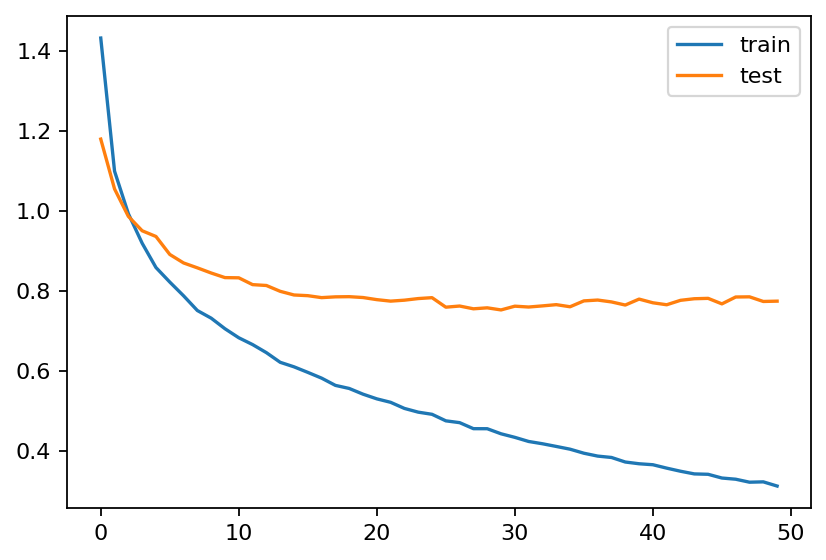

In [ ]:
model = tuner.hypermodel.build(best_params)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
loss, accuracy = model.evaluate(X_val, y_val) # utilizar un x_test, y_test que no fue utilizado para entrenamiento
print("Validation accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

# Fine Tuning

In [ ]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import keras_tuner as kt

class MyHyperModel(kt.HyperModel):
    def build(self, params):
        model = Sequential()

        param_learning_rate = params.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6])
        param_l2_reg = params.Choice('kernel_regularizer', values=[0.5, 0.05, 0.005, 0.0005])
        param_dropout = params.Choice('dropout_rate', values=[0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.005])

        model.add(Dense(512, activation="relu", kernel_regularizer=L2(param_l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(param_dropout))
        model.add(Dense(num_classes, activation="softmax"))

        opt = keras.optimizers.Adam(learning_rate=param_learning_rate)

        model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [16, 32, 64, 128]),
            **kwargs,
        )

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="val_categorical_accuracy",
    max_trials=50,
    overwrite=True,
    directory="dir",
    project_name="tune_hypermodel",
)

In [ ]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Trial 50 Complete [00h 00m 37s]
val_categorical_accuracy: 0.6293969750404358

Best val_categorical_accuracy So Far: 0.7902010083198547
Total elapsed time: 01h 47m 46s


Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - categorical_accuracy: 0.2332 - loss: 327.2199 - val_categorical_accuracy: 0.3950 - val_loss: 301.1892
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - categorical_accuracy: 0.3403 - loss: 293.6633 - val_categorical_accuracy: 0.4844 - val_loss: 270.2987
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - categorical_accuracy: 0.4327 - loss: 263.3724 - val_categorical_accuracy: 0.5508 - val_loss: 242.2752
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - categorical_accuracy: 0.4730 - loss: 236.0105 - val_categorical_accuracy: 0.5869 - val_loss: 216.8095
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - categorical_accuracy: 0.5045 - loss: 211.1197 - val_categorical_accuracy: 0.6030 - val_loss: 193.6734
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - categorical_accuracy: 0.5575 - loss: 188.4465 - val_categorical_accuracy: 0.6241 - val_loss: 172.6656
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - ca

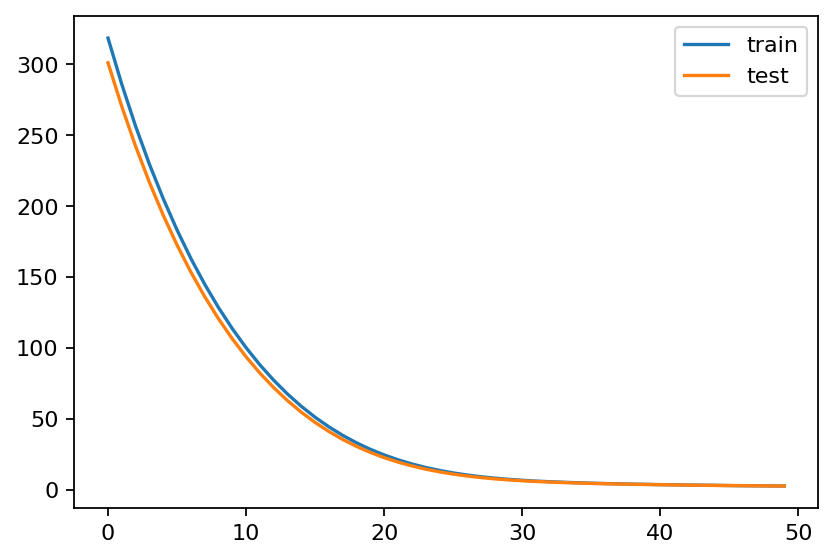

In [ ]:
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values
model = tuner.hypermodel.build(best_params)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=16)
loss, accuracy = model.evaluate(X_val, y_val) # utilizar un x_test, y_test que no fue utilizado para entrenamiento
print("Validation accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'learning_rate': 1e-05,
 'kernel_regularizer': 0.5,
 'dropout_rate': 0.4,
 'batch_size': 16}

# Best Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
import keras_tuner as kt
import pandas as pd

# Load features
features = np.load("/content/drive/My Drive/Thesis/resulting_array_mobile_net_v3.npy")

# Load labels
label_df = pd.read_csv("/content/drive/My Drive/Thesis/indexToLabel_mobile_net_v3.csv")
labels = label_df["Value"].to_numpy()
# Convert string labels to integers
label_mapping = {label: index for index, label in enumerate(np.unique(labels))}
reverse_label_mapping = {index: label for label, index in label_mapping.items()}
print(label_mapping)
print(reverse_label_mapping)
print(np.unique(labels))
labels = np.array([label_mapping[label] for label in labels])

# One-hot encode the integer labels
num_classes = len(np.unique(labels))
labels = tf.keras.utils.to_categorical(labels, num_classes)

print(labels)
print(labels.shape)
print(features.shape)
print(num_classes)

{'Emergency_Vehicle': 0, 'Explosion': 1, 'Gunshot': 2, 'Other_(Music,Bell,Speech,Silence,Sneeze)': 3, 'Power_Tool': 4}
{0: 'Emergency_Vehicle', 1: 'Explosion', 2: 'Gunshot', 3: 'Other_(Music,Bell,Speech,Silence,Sneeze)', 4: 'Power_Tool'}
['Emergency_Vehicle' 'Explosion' 'Gunshot'
 'Other_(Music,Bell,Speech,Silence,Sneeze)' 'Power_Tool']
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
(4974, 5)
(4974, 960)
5


In [ ]:
def count_samples_per_label(labels, label_mapping):
    """
    This function counts the number of samples for each label.

    Args:
    labels (np.ndarray): One-hot encoded labels array.
    label_mapping (dict): Dictionary mapping label names to integer indices.

    Returns:
    dict: Dictionary with label names as keys and counts as values.
    """
    # Convert one-hot encoded labels back to integer labels
    integer_labels = np.argmax(labels, axis=1)

    # Get the unique labels and their counts
    unique_labels, counts = np.unique(integer_labels, return_counts=True)

    # Create a dictionary to map integer labels back to label names
    reverse_label_mapping = {index: label for label, index in label_mapping.items()}

    # Create a dictionary to store the counts for each label
    label_counts = {reverse_label_mapping[label]: count for label, count in zip(unique_labels, counts)}

    return label_counts

# Example usage
label_counts = count_samples_per_label(labels, label_mapping)
print(label_counts)

{'Emergency_Vehicle': 1000, 'Explosion': 974, 'Gunshot': 1000, 'Other_(Music,Bell,Speech,Silence,Sneeze)': 1000, 'Power_Tool': 1000}


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
best_hps = {'learning_rate': 1e-05,
 'kernel_regularizer': 0.5,
 'dropout_rate': 0.4,
 'batch_size': 16}

In [ ]:
model = Sequential()
model.add(Dense(512, activation="relu", kernel_regularizer=L2(best_hps['kernel_regularizer'])))
model.add(BatchNormalization())
model.add(Dropout(best_hps['dropout_rate']))
model.add(Dense(num_classes, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=best_hps['learning_rate'])

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', patience=20, restore_best_weights=True)

# Fit the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=best_hps['batch_size'], callbacks=[early_stopping])

Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - categorical_accuracy: 0.1913 - loss: 327.8643 - val_categorical_accuracy: 0.3126 - val_loss: 301.7424
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3006 - loss: 294.2025 - val_categorical_accuracy: 0.4683 - val_loss: 270.7325
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3881 - loss: 263.8671 - val_categorical_accuracy: 0.5407 - val_loss: 242.6279
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.4640 - loss: 236.3626 - val_categorical_accuracy: 0.5879 - val_loss: 217.1015
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.5113 - loss: 211.3786 - val_categorical_accuracy: 0.6050 - val_loss: 193.9080
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.5163 - loss: 188.7447 - val_categorical_accuracy: 0.6251 - val_loss: 172.8383
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - c

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.7740 - loss: 2.1440
Validation accuracy: 0.7708542943000793


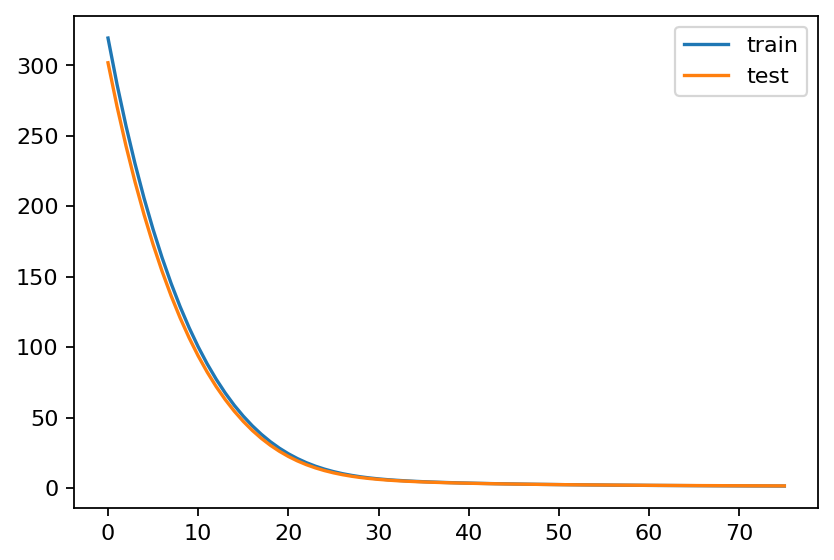

In [ ]:
loss, accuracy = model.evaluate(X_val, y_val) # utilizar un x_test, y_test que no fue utilizado para entrenamiento
print("Validation accuracy:", accuracy)
plt.figure(figsize=(6, 4), dpi=160)

plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Confusion Matrix:
[[181   3   1  14  11]
 [  7 124  40  18  11]
 [  1  30 143   9   6]
 [  4  12  26 144   8]
 [  3   2  15   7 175]]
ROC-AUC for class Emergency_Vehicle: 0.9782
ROC-AUC for class Explosion: 0.9015
ROC-AUC for class Gunshot: 0.9183
ROC-AUC for class Other_(Music,Bell,Speech,Silence,Sneeze): 0.9440
ROC-AUC for class Power_Tool: 0.9741


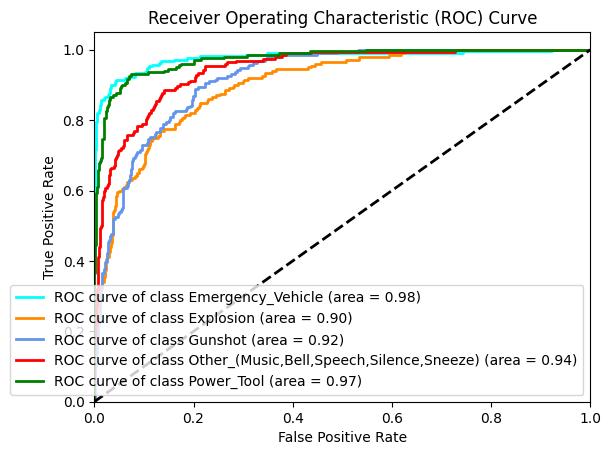

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import itertools

# Evaluate model to get predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Compute ROC-AUC for each class
roc_auc = roc_auc_score(y_val, y_val_pred, average=None)
for i, score in enumerate(roc_auc):
    print(f"ROC-AUC for class {reverse_label_mapping[i]}: {score:.4f}")

# Plotting ROC Curves
fpr = {}
tpr = {}
roc_auc_dict = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_val_pred[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = itertools.cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {reverse_label_mapping[i]} (area = {roc_auc_dict[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[181   3   1  14  11]
 [  7 124  40  18  11]
 [  1  30 143   9   6]
 [  4  12  26 144   8]
 [  3   2  15   7 175]]
Accuracy for class 'Emergency_Vehicle': 0.8619
Accuracy for class 'Explosion': 0.6200
Accuracy for class 'Gunshot': 0.7566
Accuracy for class 'Other_(Music,Bell,Speech,Silence,Sneeze)': 0.7423
Accuracy for class 'Power_Tool': 0.8663

Classification Report:
                                          precision    recall  f1-score   support

                       Emergency_Vehicle       0.92      0.86      0.89       210
                               Explosion       0.73      0.62      0.67       200
                                 Gunshot       0.64      0.76      0.69       189
Other_(Music,Bell,Speech,Silence,Sneeze)       0.75      0.74      0.75       194
                              Power_Tool       0.83      0.87      0.85       202

                                accuracy                           0.77    

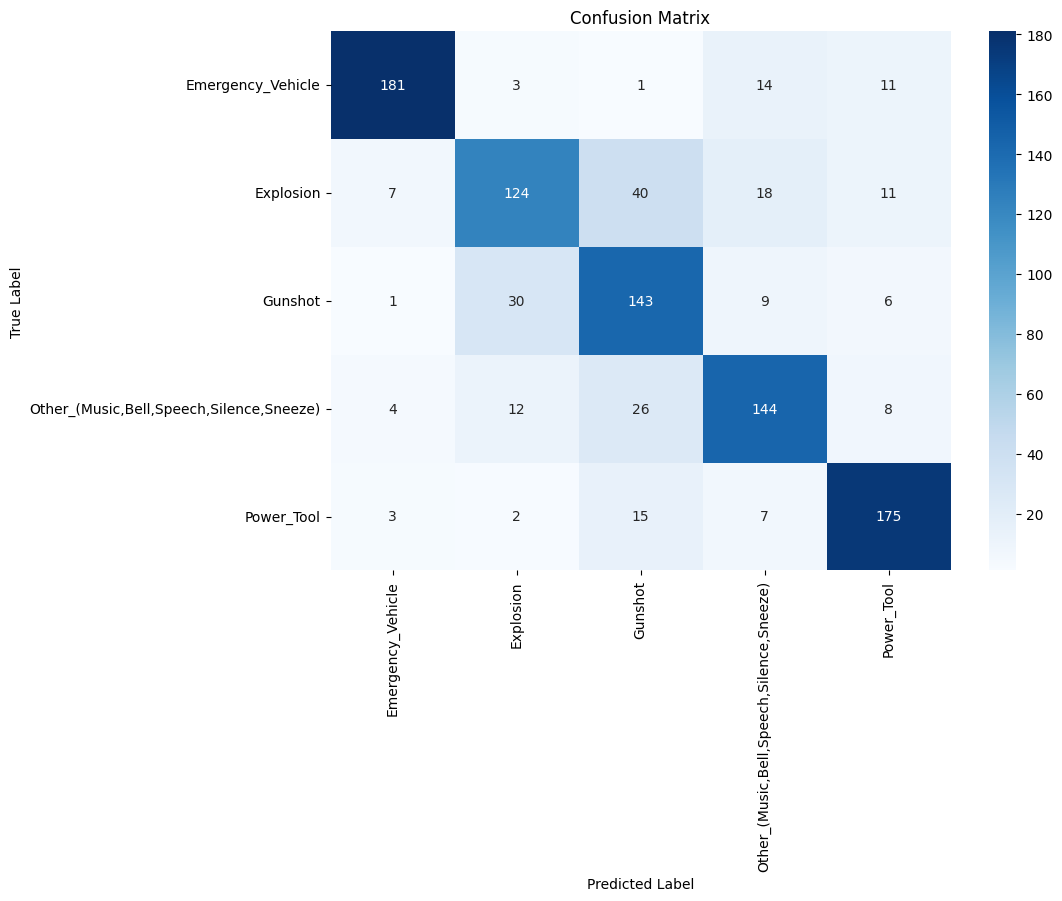

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate model to get predictions
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, get more detailed classification report
print("\nClassification Report:")
print(classification_report(y_val_true_classes, y_val_pred_classes, target_names=[reverse_label_mapping[i] for i in range(num_classes)]))

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[reverse_label_mapping[i] for i in range(num_classes)], yticklabels=[reverse_label_mapping[i] for i in range(num_classes)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate model to get predictions
y_val_pred = model.predict(X_val)

# Compute the overall ROC-AUC score
overall_roc_auc = roc_auc_score(y_val, y_val_pred, average='macro')
print(f"Overall ROC-AUC score: {overall_roc_auc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Overall ROC-AUC score: 0.9432
